In [1]:
# loading the fashion mnist dataset
import sklearn
from matplotlib import pyplot
from keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
import numpy as np

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


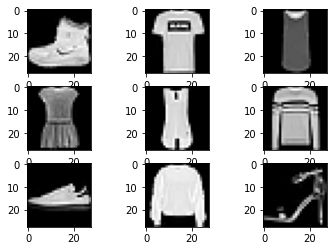

In [2]:
# load dataset
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [106]:
#train_X[0]
#נשים לב שה"פינות" שחורות כלומר הפיצרים הם 0

In [4]:
train_X = train_X/255.0

In [5]:
img =[]

for i in range ( len(train_X)):
    img.append(np.reshape(train_X[i] , 784))

In [6]:
train_X = img
train_X = np.array(train_X)
train_X.shape

(60000, 784)

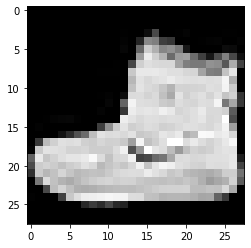

In [7]:
# הצגת תמונה 
img2 =[]

for i in range ( len(train_X)):
    img2.append(train_X[i].reshape( 28 , 28))


pyplot.imshow(img2[0], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Dimensionality reduction- הקטנת מספר הפיצ'רים לפיצ'רים החשובים יותר וויתור על הפיצ'רים שלא משפיעים הרבה על התחזית.

In [9]:
 #the PCA algorithem  : כך נדאג שנצמצם את הפיצרים אבל לא נאבד הרבה מידע
    # First it identifies the hyperplane that lies closest to the data, and then
# it projects the data onto it,

In [8]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(train_X)

In [9]:
X2D.shape

(60000, 2)

In [10]:
(X2D)

array([[-0.48625016,  6.40421332],
       [ 5.52128962, -1.77114249],
       [-2.846709  , -4.32093387],
       ...,
       [ 3.36372626, -4.62839288],
       [-3.16657461, -2.2792897 ],
       [-7.12025023, -0.46958174]])

ננסה עם מספר אחר של צירים:

In [11]:
pca = PCA(n_components = 150)
X2D = pca.fit_transform(train_X)

In [12]:
X2D

array([[-4.86250160e-01,  6.40421332e+00, -4.74918114e+00, ...,
         1.00340725e-02, -3.42250662e-01,  5.13629686e-02],
       [ 5.52128962e+00, -1.77114249e+00, -1.02363543e+00, ...,
        -1.95791511e-01,  1.42392770e-01, -3.13437243e-01],
       [-2.84670900e+00, -4.32093387e+00,  4.16291147e-01, ...,
         9.29948019e-04, -3.54849513e-04,  3.03249181e-02],
       ...,
       [ 3.36372626e+00, -4.62839288e+00, -2.04193723e+00, ...,
         5.53733125e-02, -4.84572259e-01, -4.30615304e-02],
       [-3.16657461e+00, -2.27928970e+00,  1.88360748e+00, ...,
         4.18165454e-02, -4.84178476e-02,  1.51755775e-02],
       [-7.12025023e+00, -4.69581736e-01,  1.83887764e+00, ...,
         7.19314403e-02,  1.82020979e-02, -3.35543332e-01]])

In [13]:
X2D.shape

(60000, 150)

In [14]:
#נבדוק כמה אחוז מהדאטה מוסבר כך. 
sum =0 
for i in range(len(pca.explained_variance_ratio_)):
    sum += pca.explained_variance_ratio_[i]
sum 

0.9370001593176411

In [15]:
# כדי לראות שאנחנו מכסים את רוב השונות בדאטה באלגוריתם שלנו - נגדיר לו שאנו מעוניינים ב0.95 אחוז מהשונות...
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(train_X)

In [16]:
#נבחין כי כעת לכל תמונה יש רק 187 פיצרים במקום 784
X_reduced.shape  

(60000, 187)

In [17]:
train_X.shape

(60000, 784)

In [18]:
print(pca.explained_variance_ratio_)

# 29.% of the dataset’s variance  lies along the first axis, and 17.7% on the second , and 6% at the third...

[0.29039228 0.1775531  0.06019222 0.04957428 0.03847655 0.03460769
 0.02341691 0.01905414 0.01349843 0.01314267 0.00992875 0.00913255
 0.00765793 0.00659706 0.00607851 0.00589821 0.00551934 0.005245
 0.00458079 0.00455515 0.00433684 0.00407097 0.00384758 0.00372551
 0.00361107 0.00350656 0.00333241 0.0031936  0.00308063 0.00293273
 0.00275603 0.00265062 0.00263703 0.00255835 0.00246212 0.00235901
 0.0023029  0.00225522 0.00218476 0.00209324 0.00200282 0.0019574
 0.00194689 0.00182783 0.00175354 0.00171926 0.00168792 0.00163975
 0.00160908 0.00154846 0.00152295 0.00150044 0.00146795 0.00143312
 0.00138277 0.00136997 0.00131154 0.00128846 0.00127249 0.00125851
 0.00121452 0.00120198 0.00118143 0.00116257 0.00115583 0.00112295
 0.00111075 0.00109669 0.00105128 0.00104659 0.001031   0.00101051
 0.00097795 0.00095689 0.00093915 0.00093383 0.00092531 0.00090256
 0.00089325 0.00087182 0.00085407 0.00084291 0.00082514 0.00081422
 0.00080513 0.00079751 0.00077642 0.00076947 0.00076381 0.0007521

In [19]:
#print((pca.explained_variance_ratio_))
#בדקנו ואכן 95 אחוז מהמידע נחזה עם הפיצ'רים המצומצמים והצירים החדשים של האלגוריתם
sum =0 
for i in range(len(pca.explained_variance_ratio_)):
    sum += pca.explained_variance_ratio_[i]
sum 

0.9500039103537347

#### Helpful function - showImage

In [20]:
import matplotlib
import matplotlib.pyplot as plt

In [21]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

# xgboost Model

In [22]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [23]:
xgb_clf = XGBClassifier(n_estimators=20, max_depth=5, random_state=42)
# For max_depth parameter, typical values are between 3 to 10
xgb_clf.fit(train_X, train_y)

C:\Users\Alon\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:43:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=20, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [24]:
# Let us predict some instance from the data set using the above trained model
y_train_predict = xgb_clf.predict(train_X[0].reshape(1, -1))

In [25]:
class_names[y_train_predict[0]]

'Ankle boot'

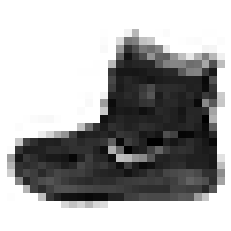

In [26]:
showImage(train_X[0])

In [27]:
# Let us predict all instances of training dataset train_X using the above trained model
y_train_predict = xgb_clf.predict(train_X)

In [28]:
accuracy_score(train_y, y_train_predict)

0.9062666666666667